# Assignment - 1
# Predictive Modelling of Eating-Out Problem

### Student's name: Chloe Huynh
### Student's ID: u3245751

## Part A - Importing and Understanding Data

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import geopandas as gpd
from shapely.geometry import Point

In [3]:
# What data available in our data directory
for direname, _ , filenames in os.walk("data"):
    for filename in filenames:
        print(os.path.join(direname, filename))

data/sydney.geojson
data/zomato_df_final_data.csv


In [4]:
# Load the dataset
data_path = "data/zomato_df_final_data.csv"
df = pd.read_csv(data_path)
df.head()

address   cost  \
0                      371A Pitt Street, CBD, Sydney   50.0   
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   80.0   
2   Level G, The Darling at the Star, 80 Pyrmont ...  120.0   
3   Sydney Opera House, Bennelong Point, Circular...  270.0   
4              20 Campbell Street, Chinatown, Sydney   55.0   

                                       cuisine        lat  \
0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean'] -33.876059   
1  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké'] -33.910999   
2                                 ['Japanese'] -33.867971   
3                        ['Modern Australian'] -33.856784   
4                            ['Thai', 'Salad'] -33.879035   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   
2        https://www.zomato.com/sydney/sokyo-pyrmont  151.195210   
3  https://www.zomato.com/sydney/bennelong-restau...  151.215297   
4  https://www.zomato.com/sydney/chat-thai-chinatown  151.206409   

          phone  rating_number rating_text  \
0  02 8318 0406            4.0   Very Good   
1  02 9699 2225            4.6   Excellent   
2  1800 700 700            4.9   Excellent   
3  02 9240 8000            4.9   Excellent   
4  02 8317 4811            4.5   Excellent   

                                 subzone                           title  \
0                                    CBD                   Sydney Madang   
1  The Grounds of Alexandria, Alexandria  The Grounds of Alexandria Cafe   
2                      The Star, Pyrmont                           Sokyo   
3                          Circular Quay            Bennelong Restaurant   
4                              Chinatown                       Chat Thai   

                     type   votes  groupon    color     cost_2 cuisine_color  
0       ['Casual Dining']  1311.0    False  #e15307   5.243902       #6f706b  
1                ['Café']  3236.0    False  #9c3203   7.560976       #6f706b  
2         ['Fine Dining']  1227.0    False  #7f2704  10.650407       #6f706b  
3  ['Fine Dining', 'Bar']   278.0    False  #7f2704  22.235772       #4186f4  
4       ['Casual Dining']  2150.0    False  #a83703   5.630081       #6f706b

### Exploratory data analysis

In [5]:
# Data shape
print(df.shape)

# Column names
print(df.columns)

(10500, 17)
Index(['address', 'cost', 'cuisine', 'lat', 'link', 'lng', 'phone',
       'rating_number', 'rating_text', 'subzone', 'title', 'type', 'votes',
       'groupon', 'color', 'cost_2', 'cuisine_color'],
      dtype='object')


In [6]:
# Summary of dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        10500 non-null  object 
 1   cost           10154 non-null  float64
 2   cuisine        10500 non-null  object 
 3   lat            10308 non-null  float64
 4   link           10500 non-null  object 
 5   lng            10308 non-null  float64
 6   phone          10500 non-null  object 
 7   rating_number  7184 non-null   float64
 8   rating_text    7184 non-null   object 
 9   subzone        10500 non-null  object 
 10  title          10500 non-null  object 
 11  type           10452 non-null  object 
 12  votes          7184 non-null   float64
 13  groupon        10500 non-null  bool   
 14  color          10500 non-null  object 
 15  cost_2         10154 non-null  float64
 16  cuisine_color  10500 non-null  object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1

In [7]:
# Cuisine column processing 
df['cuisine'] = df['cuisine'].str.split(', ')
cuisine_df = df.explode("cuisine").reset_index(drop=True)
cuisine_df['cuisine'] = cuisine_df['cuisine'].astype(str)
cuisine_df['cuisine'] = cuisine_df['cuisine'].str.replace('[', '')
cuisine_df['cuisine'] = cuisine_df['cuisine'].str.replace("'", '')
cuisine_df['cuisine'] = cuisine_df['cuisine'].str.replace("]", '')

/var/folders/02/lspf_dmn19g6q514lw374fl00000gn/T/ipykernel_926/4046806965.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cuisine_df['cuisine'] = cuisine_df['cuisine'].str.replace('[', '')
/var/folders/02/lspf_dmn19g6q514lw374fl00000gn/T/ipykernel_926/4046806965.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cuisine_df['cuisine'] = cuisine_df['cuisine'].str.replace("]", '')


In [8]:
# Type column processing 
cuisine_df['type'] = cuisine_df ['type'].str.split(', ')
cuisine_df = cuisine_df.explode("type").reset_index(drop=True)
cuisine_df['type'] = cuisine_df['type'].astype(str)
cuisine_df['type'] = cuisine_df['type'].str.replace('[', '')
cuisine_df['type'] = cuisine_df['type'].str.replace("'", '')
cuisine_df['type'] = cuisine_df['type'].str.replace("]", '')

/var/folders/02/lspf_dmn19g6q514lw374fl00000gn/T/ipykernel_926/1900844298.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cuisine_df['type'] = cuisine_df['type'].str.replace('[', '')
/var/folders/02/lspf_dmn19g6q514lw374fl00000gn/T/ipykernel_926/1900844298.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cuisine_df['type'] = cuisine_df['type'].str.replace("]", '')


In [9]:
# Summary of missing value in dataset
count_missing_df = cuisine_df.isna().sum()
count_missing_df

address             0
cost              584
cuisine             0
lat               340
link                0
lng               340
phone               0
rating_number    5404
rating_text      5404
subzone             0
title               0
type                0
votes            5404
groupon             0
color               0
cost_2            584
cuisine_color       0
dtype: int64

### Explore categorical variables

In [10]:
# Categrical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print("There are {} categorical variables\n".format(len(categorical)))
print("The categorical variables are: ", categorical)
df[categorical].head()

There are 10 categorical variables

The categorical variables are:  ['address', 'cuisine', 'link', 'phone', 'rating_text', 'subzone', 'title', 'type', 'color', 'cuisine_color']


address  \
0                      371A Pitt Street, CBD, Sydney   
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   
2   Level G, The Darling at the Star, 80 Pyrmont ...   
3   Sydney Opera House, Bennelong Point, Circular...   
4              20 Campbell Street, Chinatown, Sydney   

                                         cuisine  \
0   [['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']]   
1  [['Cafe', 'Coffee and Tea', 'Salad', 'Poké']]   
2                                 [['Japanese']]   
3                        [['Modern Australian']]   
4                            [['Thai', 'Salad']]   

                                                link         phone  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  02 8318 0406   
1  https://www.zomato.com/sydney/the-grounds-of-a...  02 9699 2225   
2        https://www.zomato.com/sydney/sokyo-pyrmont  1800 700 700   
3  https://www.zomato.com/sydney/bennelong-restau...  02 9240 8000   
4  https://www.zomato.com/sydney/chat-thai-chinatown  02 8317 4811   

  rating_text                                subzone  \
0   Very Good                                    CBD   
1   Excellent  The Grounds of Alexandria, Alexandria   
2   Excellent                      The Star, Pyrmont   
3   Excellent                          Circular Quay   
4   Excellent                              Chinatown   

                            title                    type    color  \
0                   Sydney Madang       ['Casual Dining']  #e15307   
1  The Grounds of Alexandria Cafe                ['Café']  #9c3203   
2                           Sokyo         ['Fine Dining']  #7f2704   
3            Bennelong Restaurant  ['Fine Dining', 'Bar']  #7f2704   
4                       Chat Thai       ['Casual Dining']  #a83703   

  cuisine_color  
0       #6f706b  
1       #6f706b  
2       #6f706b  
3       #4186f4  
4       #6f706b

In [11]:
# Check which of these variables has missing values?
cat_with_missing = [var for var in categorical if df[var].isnull().sum() > 0]
print(df[cat_with_missing].isnull().sum())

rating_text    3316
type             48
dtype: int64


In [12]:
# Percentage of missing values in each variable
round(cuisine_df[categorical].isnull().mean(), 2)

address          0.00
cuisine          0.00
link             0.00
phone            0.00
rating_text      0.29
subzone          0.00
title            0.00
type             0.00
color            0.00
cuisine_color    0.00
dtype: float64

In [13]:
# Impute missing categorical variables with most frequent value
for df_temp in [cuisine_df]:
    for col in categorical:
        col_mode = cuisine_df[col].mode()[0] 
        df_temp[col].fillna(col_mode, inplace=True)

# Check again missing values in numerical variables
cuisine_df[categorical].isnull().sum()

address          0
cuisine          0
link             0
phone            0
rating_text      0
subzone          0
title            0
type             0
color            0
cuisine_color    0
dtype: int64

### Explore Numerical Variables

In [14]:
# Find numerical variables
numericals = [var for var in df.columns if df[var].dtype != 'O']
print('There are {} numerical variables\n'.format(len(numericals)))
print('The numerical variables are :', numericals)
df[numericals].head()

There are 7 numerical variables

The numerical variables are : ['cost', 'lat', 'lng', 'rating_number', 'votes', 'groupon', 'cost_2']


cost        lat         lng  rating_number   votes  groupon     cost_2
0   50.0 -33.876059  151.207605            4.0  1311.0    False   5.243902
1   80.0 -33.910999  151.193793            4.6  3236.0    False   7.560976
2  120.0 -33.867971  151.195210            4.9  1227.0    False  10.650407
3  270.0 -33.856784  151.215297            4.9   278.0    False  22.235772
4   55.0 -33.879035  151.206409            4.5  2150.0    False   5.630081

In [15]:
# Summary statistics in numerical variables
print(round(df[numericals].describe()), 2)

          cost      lat      lng  rating_number   votes   cost_2
count  10154.0  10308.0  10308.0         7184.0  7184.0  10154.0
mean      51.0    -33.0    148.0            3.0    84.0      5.0
std       28.0      8.0     27.0            0.0   175.0      2.0
min        8.0    -38.0   -123.0            2.0     4.0      2.0
25%       30.0    -34.0    151.0            3.0    12.0      4.0
50%       45.0    -34.0    151.0            3.0    32.0      5.0
75%       60.0    -34.0    151.0            4.0    87.0      6.0
max      500.0     52.0    153.0            5.0  3236.0     40.0 2


In [16]:
# Percentage of missing values in each variable
round(cuisine_df[numericals].isnull().mean(), 2)

cost             0.03
lat              0.02
lng              0.02
rating_number    0.29
votes            0.29
groupon          0.00
cost_2           0.03
dtype: float64

In [17]:
# Impute the missing values with the median values
for df_temp in [cuisine_df]:
    for col in numericals:
        col_median = cuisine_df[col].median() 
        df_temp[col].fillna(col_median, inplace=True)
        
# Check again missing values in numerical variables in X_train
cuisine_df[numericals].isnull().sum()

cost             0
lat              0
lng              0
rating_number    0
votes            0
groupon          0
cost_2           0
dtype: int64

In [18]:
# Save the file for Tableau
import csv

zomato_df_clean= pd.DataFrame(cuisine_df)

zomato_df_clean.to_csv('zomato_df_clean.csv', index=False)

## 1. Provide plots/graphs to support

### a) How many unique cuisines are served by Sydney restaurants?

In [19]:
# Flatten the list of cuisines and find unique ones
all_cuisines = [cuisine for sublist in df['cuisine'] for cuisine in sublist]
unique_cuisines = set(all_cuisines)
cuisine_counts = pd.Series(all_cuisines).value_counts()

unique_cuisines = cuisine_df.groupby(['cuisine']).size().reset_index().rename(columns={0: "Cuisine_Count"})

In [20]:
# Sort unique_cuisines DataFrame by 'Cuisine_Count' in descending order
unique_cuisines = unique_cuisines.sort_values(by='Cuisine_Count', ascending=False)
cuisine_counts = unique_cuisines.groupby('cuisine')['Cuisine_Count'].sum().reset_index()

# Count unique cuisines
unique_cuisine_count = len(unique_cuisines)

print(f'Number of unique cuisines: {unique_cuisine_count}')

Number of unique cuisines: 134


In [21]:
# Identify cuisines with counts less than 200
cuisine_under200 = cuisine_counts[cuisine_counts['Cuisine_Count'] < 200]

# Create "Others" category and aggregate counts
other_category = {'cuisine': 'Others', 
                  'Cuisine_Count': cuisine_under200['Cuisine_Count'].sum()}

# Remove rows under 200 times occur
cuisine_counts = cuisine_counts[~cuisine_counts['cuisine'].isin(cuisine_under200['cuisine'])]

# Append the "Others" category
cuisine_counts = pd.concat([cuisine_counts, pd.DataFrame([other_category])], ignore_index=True)

# Sort the DataFrame by cuisine count
cuisine_counts = cuisine_counts.sort_values(by='Cuisine_Count', ascending=False)

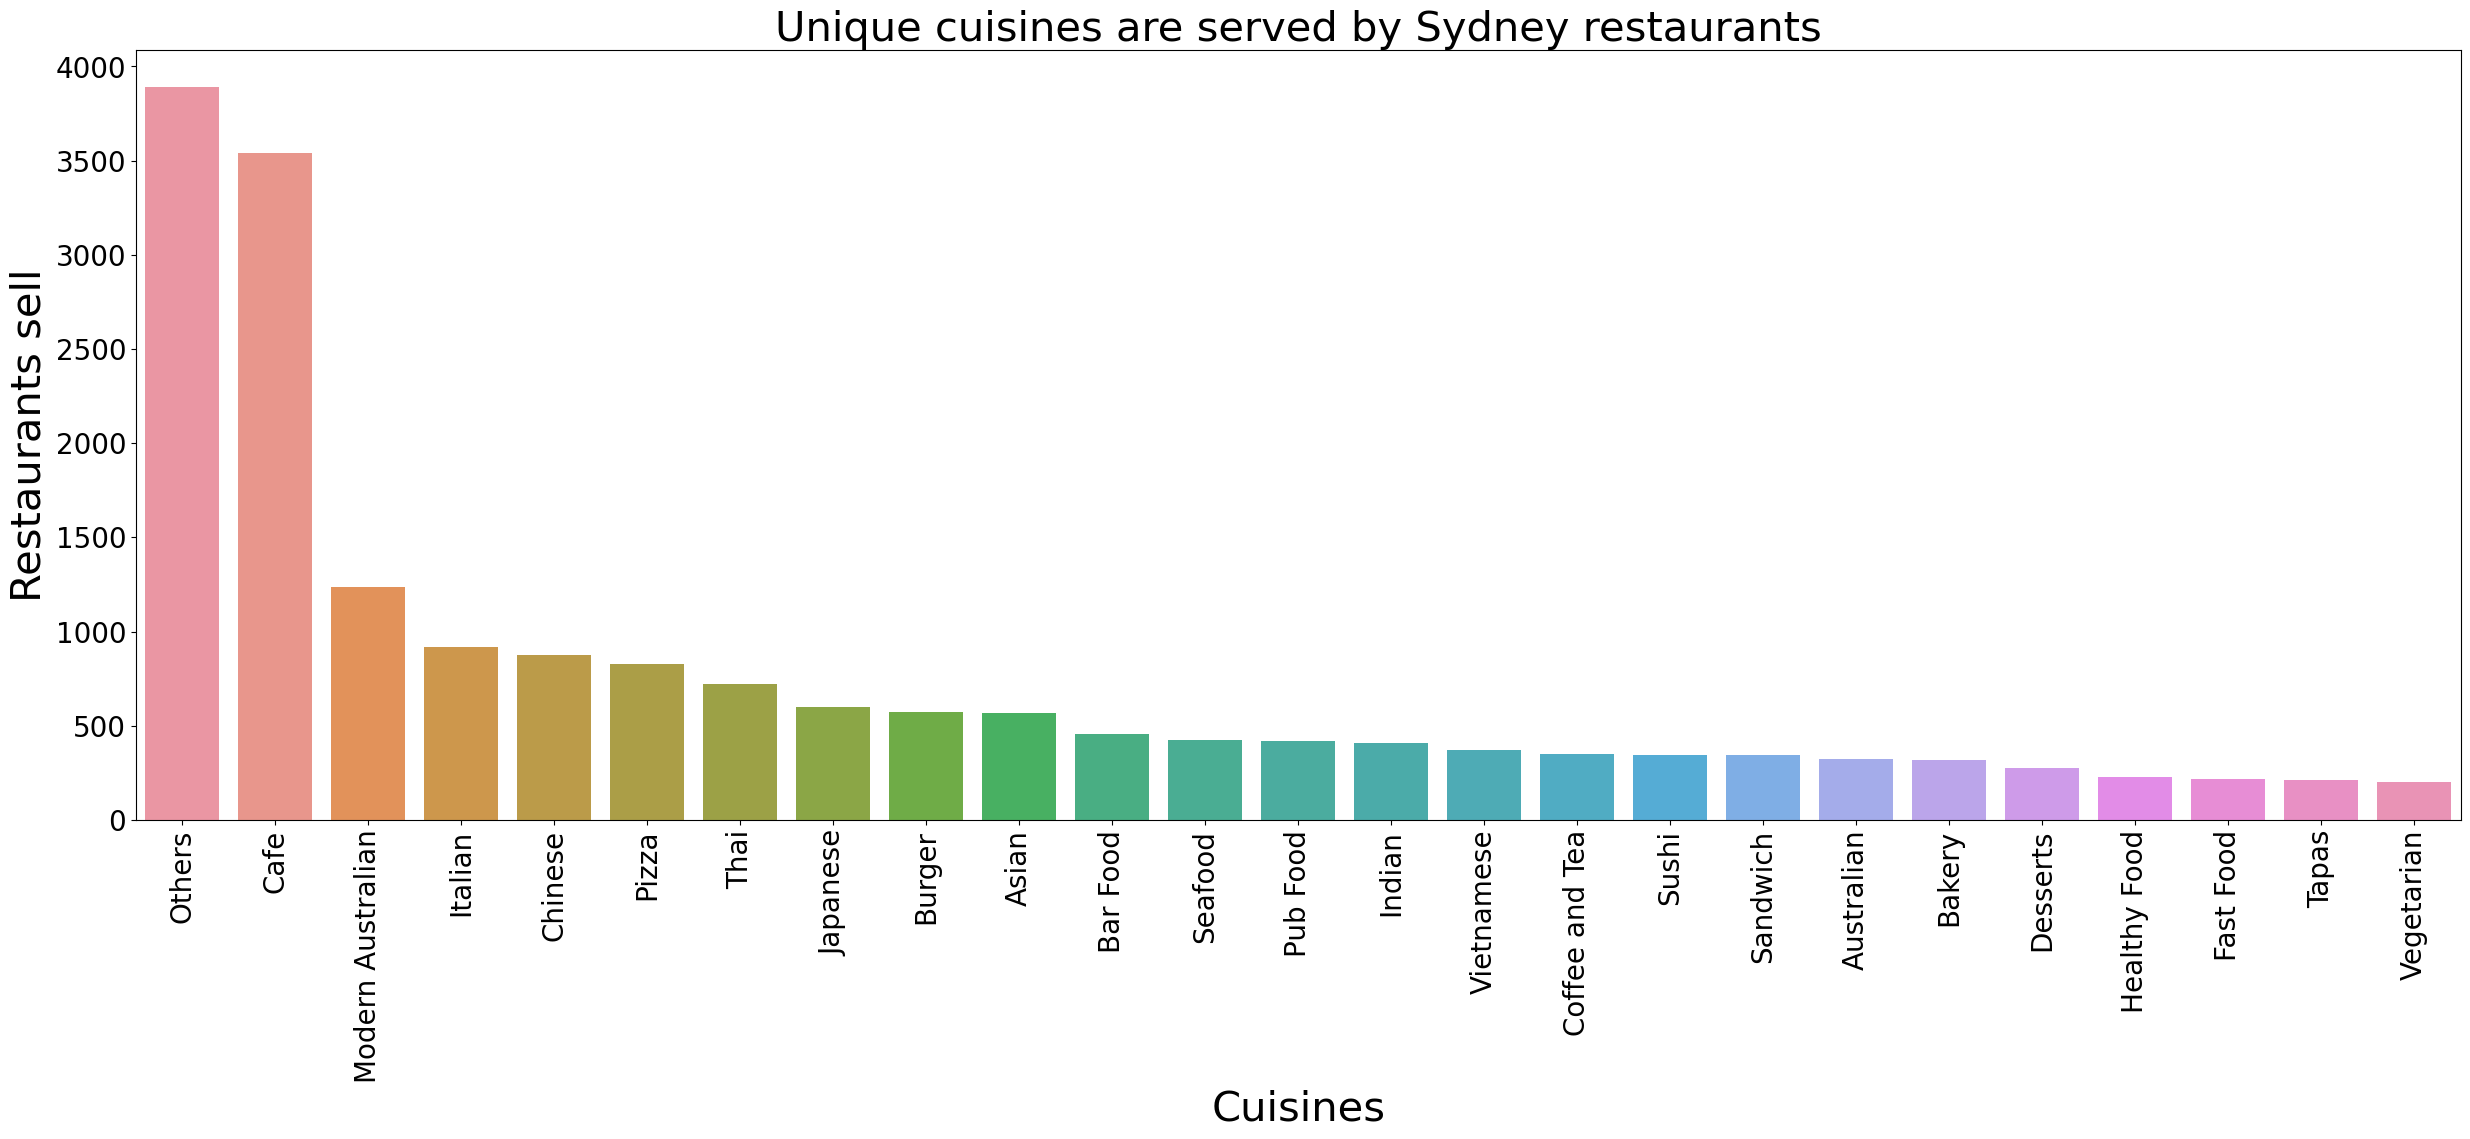

In [22]:
# Create the bar plot
plt.figure(figsize=(30, 10))
sns.barplot(x='cuisine', y='Cuisine_Count', data=cuisine_counts)
plt.title('Unique cuisines are served by Sydney restaurants', size=30)
plt.xlabel('Cuisines', size=30)
plt.ylabel('Restaurants sell', size=30)
plt.yticks(size = 20)
plt.xticks(rotation=90, size = 20) 
plt.show()

There are 134 unique cuisines served by Sydney restaurants. Cafe is the most popular cuisine, suggesting that it is a staple and a central offering in many dining establishments. After that, the next most favoured cuisines are Modern Australian, Italian and Chinese cuisine.

### b) Which suburbs (top 3) have the highest number of restaurants?

In [23]:
# Count the number of restaurants in each suburb
subzone_counts = df['subzone'].value_counts()

subzone_counts

CBD                                         476
Surry Hills                                 260
Parramatta                                  225
Darlinghurst                                188
Chinatown                                   174
                                           ... 
The Sydney Boulevard Hotel, Darlinghurst      1
Pullman Quay Grand Sydney Harbour, CBD        1
Chullora                                      1
Marriott Sydney Harbour, Circular Quay        1
Holiday Inn Old Sydney, The Rocks             1
Name: subzone, Length: 572, dtype: int64

In [24]:
# Get the top 3 suburbs with the highest number of restaurants
top_3_subzone = subzone_counts.head(3)

# Print the results
print("Top 3 suburbs with the highest number of restaurants:")
print(top_3_subzone)

Top 3 suburbs with the highest number of restaurants:
CBD            476
Surry Hills    260
Parramatta     225
Name: subzone, dtype: int64


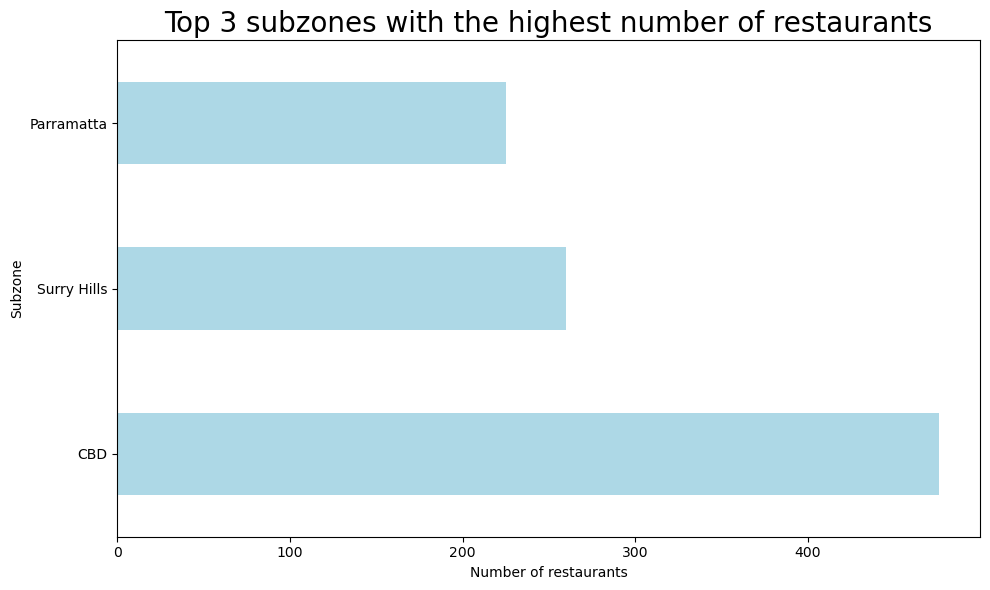

In [25]:
# Plotting the result
plt.figure(figsize=(10, 6))
top_3_subzone.plot(kind='barh', color='lightblue')

plt.title('Top 3 subzones with the highest number of restaurants', fontsize = 20)
plt.xlabel('Number of restaurants')
plt.ylabel('Subzone')
plt.tight_layout()
plt.show()

There are the top 3 subzones with the highest number of restaurants. CBD, known as the Central Business District has the highest number at 476 restaurants compared to other subzone. Parramatta suburb is a buzzing commercial area with a developing art and film scene, placing it in the 2nd with 260. While Surry Hills is in the 3rd place with 225 restaurants, a dynamic neighbourhood recognized for its trendy cultural and café scene. The terraced houses along Crown and Cleveland Streets feature trendy coffee shops, fashion boutiques, and diverse restaurants.

### c) “Restaurants with ‘excellent’ ratings are mostly costly while those with ‘Poor’ ratings are rarely expensive”. Do you agree with this statement or not?

In [26]:
# Calculate the average and count the number by rating_text 
average_cost = cuisine_df.groupby('rating_text')['cost'].agg(['mean', 'count']).reset_index()
average_cost

rating_text       mean  count
0     Average  48.473858  13293
1   Excellent  87.795276    127
2        Good  61.534908   3767
3        Poor  57.835443    395
4   Very Good  72.840866   1062

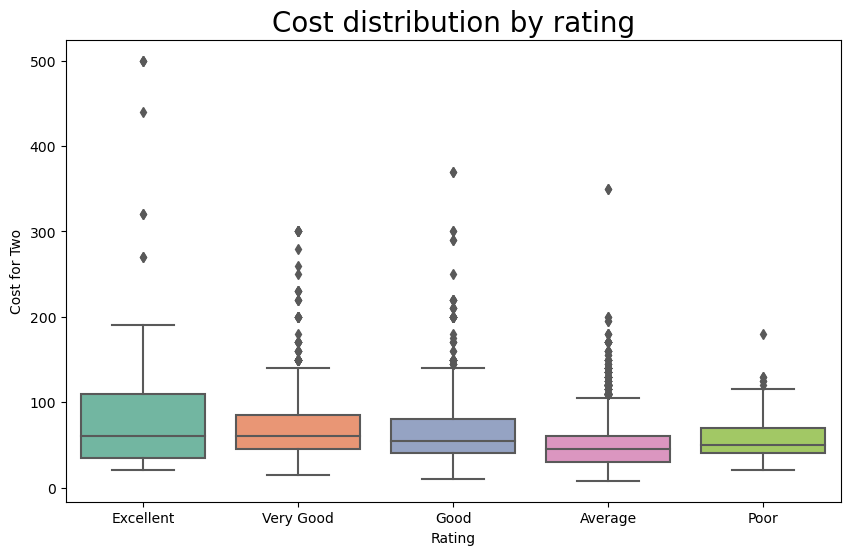

In [27]:
# Display as a boxplot
colors = sns.color_palette("Set2")

# Define the desired order
rating_order = ['Excellent', 'Very Good', 'Good', 'Average', 'Poor']

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=cuisine_df, x='rating_text', y='cost', palette=colors, order=rating_order)
plt.xlabel('Rating')
plt.ylabel('Cost for Two')
plt.title('Cost distribution by rating', fontsize=20)
plt.show()

According to the number and visual, the average cost for 'Excellent' ratings is significantly higher than other categories, which claim that these restaurants are costly. In contrast, the average cost for 'Poor' ratings is slightly higher than 'Average', but lower than 'Good' ratings. It means that it is not as low as expected based on the statement. 

Therefore, I only agree with the first part that it will be costly for 'Excellent' rating restaurants and disagree with the 'Poor' ratings are rarely expensive. 

## 2. Exploratory analysis

In [28]:
# Function to explore each of the categorical variables
def explore_categorical(df, var):
    # check if the variable has any missing values
    print('********** missing values **********')
    print(df[var].isnull().sum())
    print('********** Labels **********')
    # check unique lables in variable
    print(df[var].unique())
    print('********** frequency **********')
    # check frequency of each variable
    print(df[var].value_counts())

In [29]:
explore_categorical(cuisine_df, 'rating_text')

********** missing values **********
0
********** Labels **********
['Very Good' 'Excellent' 'Good' 'Average' 'Poor']
********** frequency **********
Average      13293
Good          3767
Very Good     1062
Poor           395
Excellent      127
Name: rating_text, dtype: int64


In [30]:
explore_categorical(cuisine_df, 'type')

********** missing values **********
0
********** Labels **********
['Casual Dining' 'Café' 'Fine Dining' 'Bar' 'Dessert Parlour' 'Wine Bar'
 'Fast Food' 'Bakery' 'Food Court' 'Pub' 'Food Truck' 'nan' 'Club'
 'Beverage Shop' 'Food Stall']
********** frequency **********
Casual Dining      8977
Café               5110
Bar                1168
Fast Food           991
Food Court          797
Pub                 549
Bakery              379
Fine Dining         189
Wine Bar            170
Dessert Parlour     159
nan                  83
Beverage Shop        25
Food Truck           23
Club                 21
Food Stall            3
Name: type, dtype: int64


Text(0, 0.5, 'rating_number')

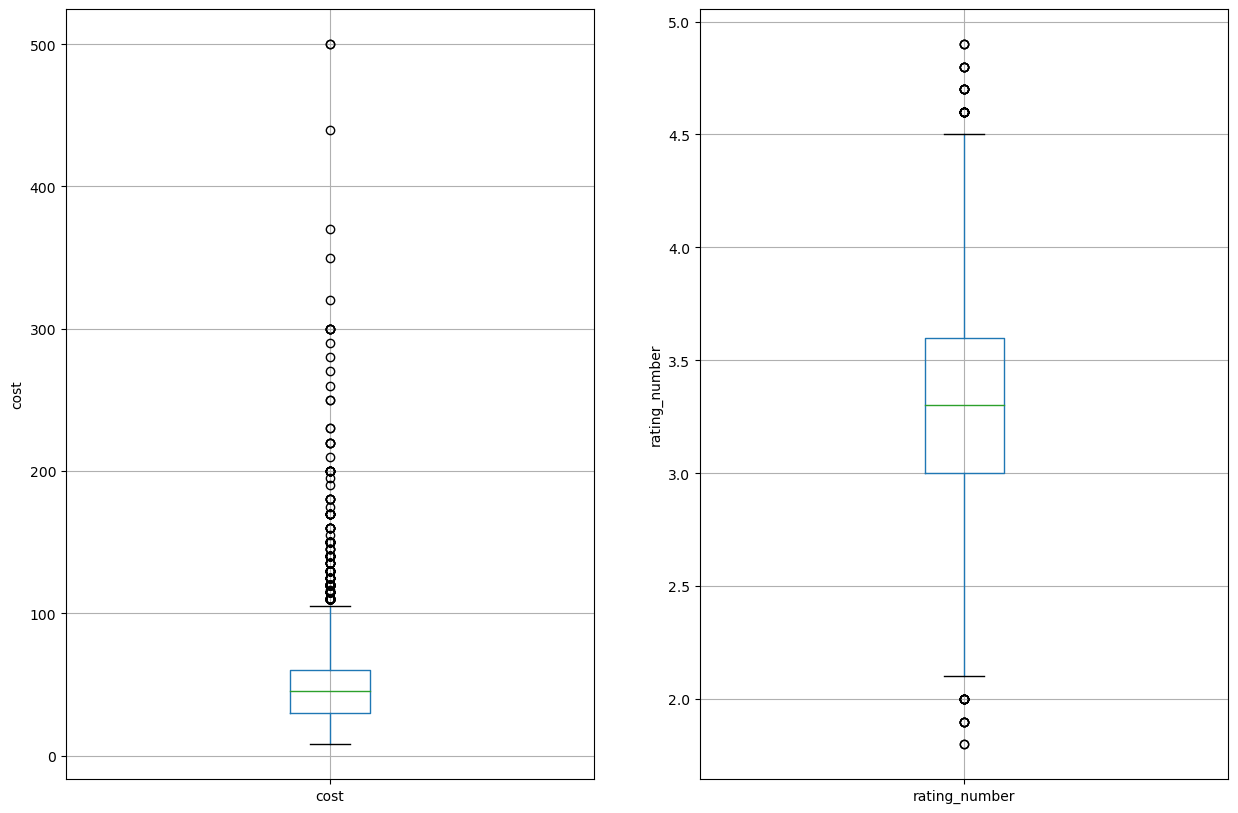

In [31]:
# Boxplots to visualise outliers in these variables
plt.figure(figsize=(15, 10))
plt.subplot(1,2,1)
fig = df.boxplot(column= 'cost')
fig.set_title('')
fig.set_ylabel('cost')

plt.subplot(1,2,2)
fig = df.boxplot(column= 'rating_number')
fig.set_title('')
fig.set_ylabel('rating_number')

### a) EDA for cost

In [32]:
# Summary statistics for the cost variable
print(cuisine_df['cost'].describe())

count    18644.000000
mean        52.967014
std         28.240115
min          8.000000
25%         35.000000
50%         45.000000
75%         65.000000
max        500.000000
Name: cost, dtype: float64


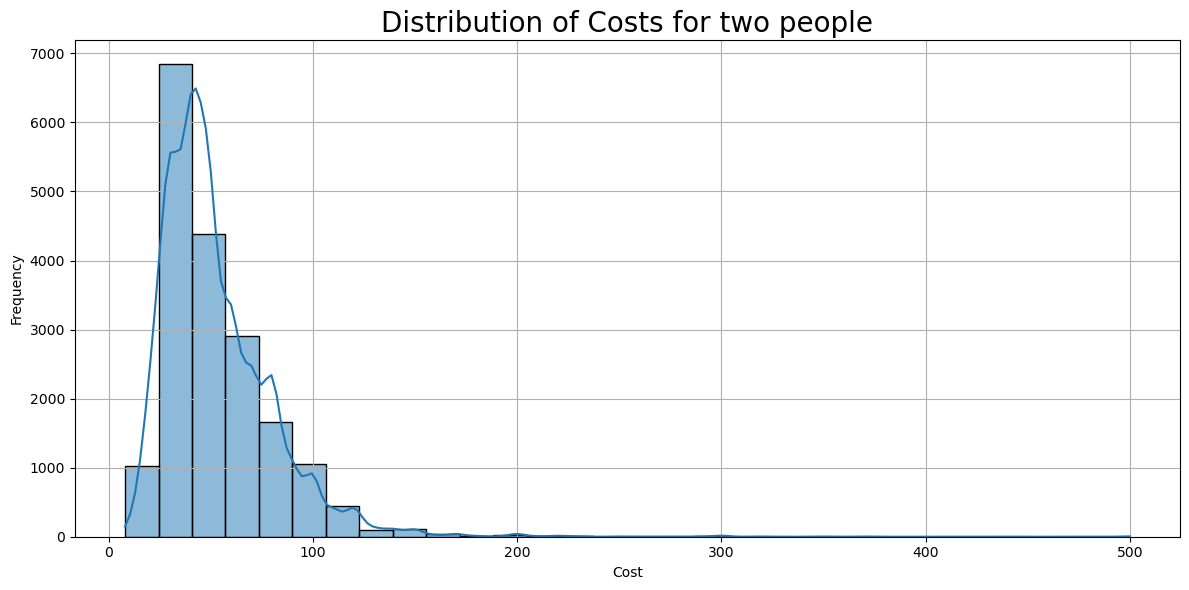

In [33]:
# Display distribution of cost
plt.figure(figsize=(12, 6))
sns.histplot(cuisine_df['cost'], bins=30, kde=True)
plt.title('Distribution of Costs for two people', fontsize=20)
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

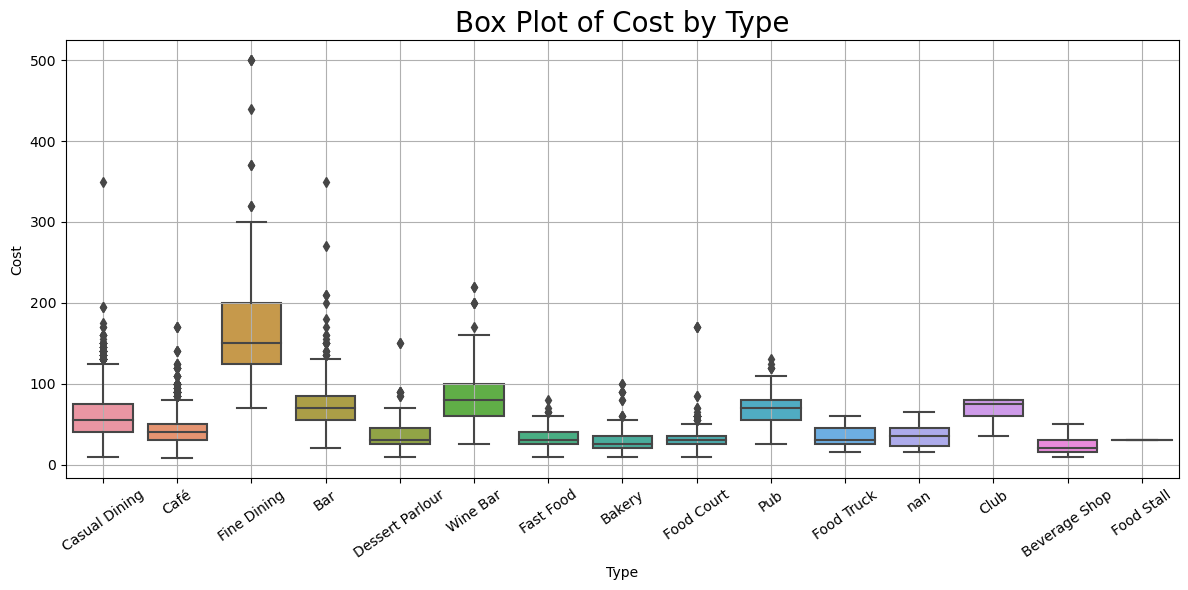

In [34]:
# Display boxplot of cost by type of restaurant
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='cost', data=cuisine_df)
plt.title('Box Plot of Cost by Type', fontsize=20)
plt.xlabel('Type')
plt.ylabel('Cost')
plt.xticks(rotation=35)
plt.grid(True)
plt.tight_layout()
plt.show()

It is noteworthy that fine dining tends to be more expensive than other forms of entertainment. Wine bars generally have higher costs than regular bars; however, some bars have higher prices than wine bars, leading to more variability in their pricing. In contrast, fast food, bakeries, and food courts exhibit similar price ranges

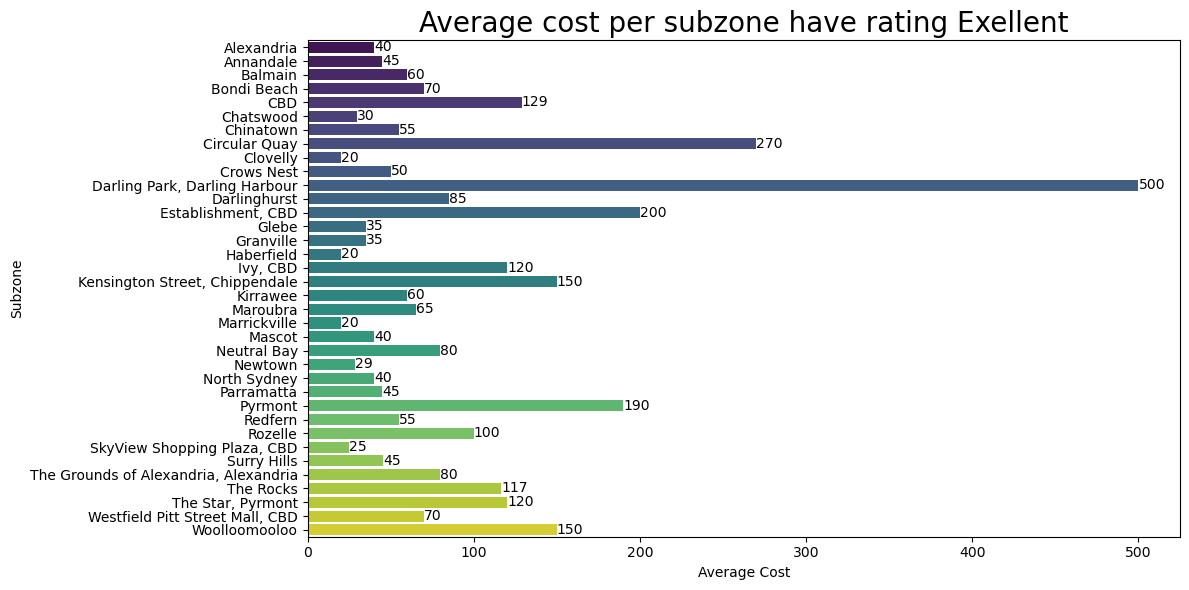

In [35]:
# Display the average cost by subzone have rating 'Exellent'
high_rating_df = cuisine_df[cuisine_df['rating_number'] >= 4.5]
average_cost = high_rating_df.groupby('subzone')['cost'].mean().reset_index()

plt.figure(figsize=(12, 6))
barplot = sns.barplot(y='subzone', x='cost', data=average_cost, palette='viridis')

barplot.bar_label(barplot.containers[0], fmt='%.0f', label_type='edge')
plt.title('Average cost per subzone have rating Exellent', fontsize=20)
plt.ylabel('Subzone')
plt.xlabel('Average Cost')
plt.tight_layout()
plt.show()

Restaurants with an 'Excellent' rating in the Circular Quay and Establishment CBD areas have higher average costs (i.e. more than $200 for two people) than other subzones. This is largely due to high foot traffic and proximity to tourist attractions, which lead to increased rental costs for businesses. These expenses are typically reflected in menu prices, as restaurants in these prime locations seek to cover operational costs while providing a high-quality dining experience. 

In contrast, areas like Clovelly and Haberfield and other more distant subzones, have significantly lower average costs for two people, typically around $20. This difference can be attributed to lower rental prices and less demand, making dining more affordable in these locations.

### b) EDA for rating

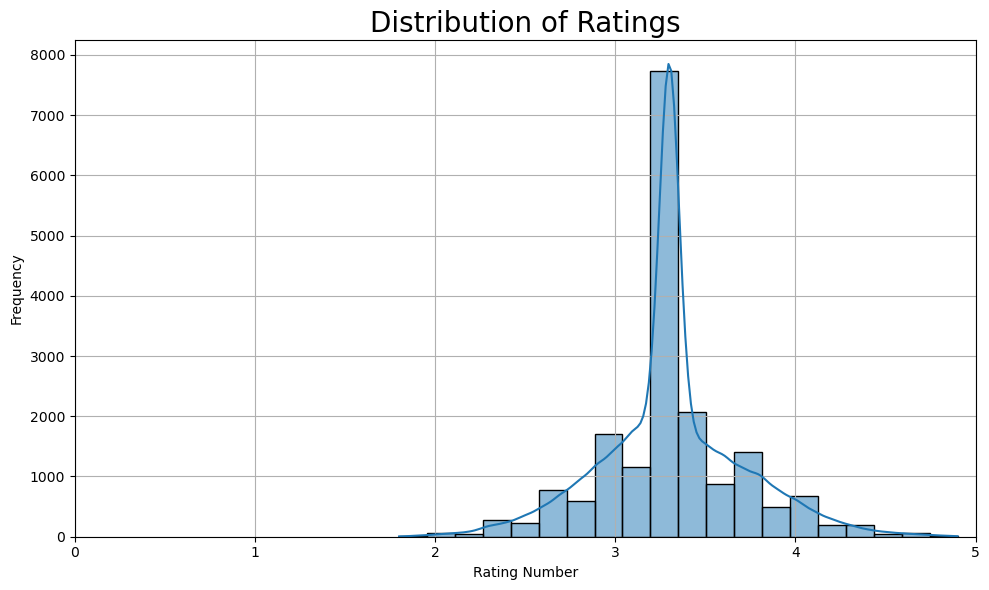

In [36]:
# Create a histogram for distribuition of rating
rating = cuisine_df['rating_number'].tolist()

plt.figure(figsize=(10, 6))
sns.histplot(cuisine_df['rating_number'], bins=20, kde=True)
plt.title('Distribution of Ratings', fontsize=20)
plt.xlabel('Rating Number')
plt.ylabel('Frequency')
plt.xlim(0, 5) 
plt.grid(True)
plt.tight_layout()
plt.show()

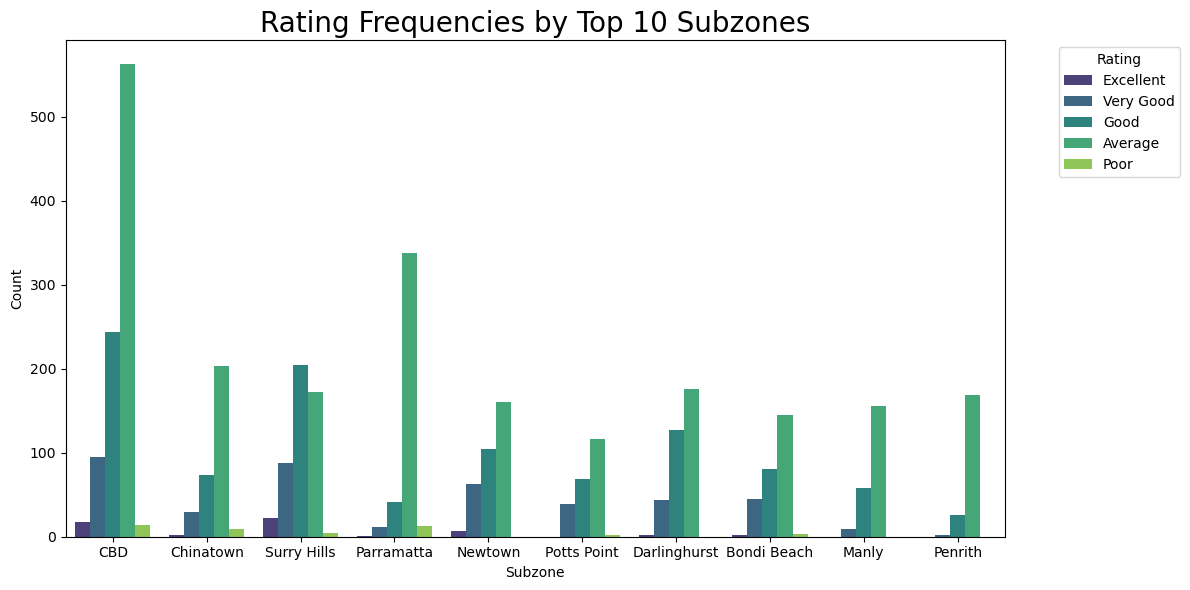

In [37]:
# Create a histogram for rating top 10 subzone
top_subzones = cuisine_df['subzone'].value_counts().nlargest(10).index

# Filter the DataFrame for only the top 10 subzones
filtered_cuisine_df = cuisine_df[cuisine_df['subzone'].isin(top_subzones)]

# Define the desired order
rating_order = ['Excellent', 'Very Good', 'Good', 'Average', 'Poor']

# Create the a plot
plt.figure(figsize=(12, 6))
sns.countplot(x='subzone', hue='rating_text', data=filtered_cuisine_df, palette='viridis', hue_order=rating_order)
plt.title('Rating Frequencies by Top 10 Subzones', fontsize=20)
plt.xlabel('Subzone')
plt.ylabel('Count')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Most restaurants have an average rating, while those with 'Excellent' and 'Very Good' ratings are primarily concentrated in the CBD and Surry Hills areas. This indicates that these areas offer higher-quality dining experiences, possibly because of their lively culinary environments and increased foot traffic.

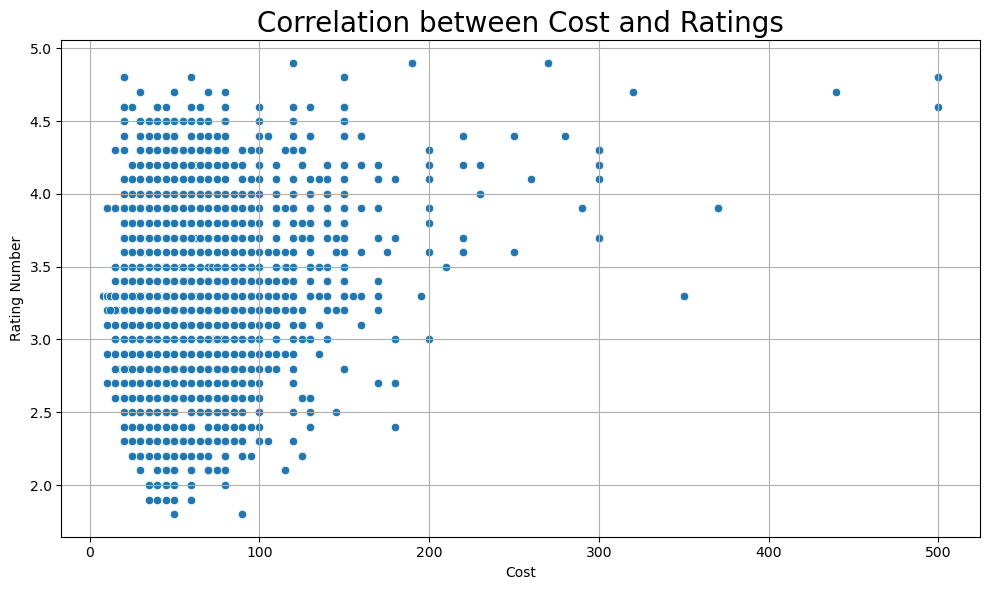

In [38]:
# Relational plot between cost and rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cost', y='rating_number', data=cuisine_df)
plt.title('Correlation between Cost and Ratings', fontsize=20)
plt.xlabel('Cost')
plt.ylabel('Rating Number')
plt.grid(True)
plt.tight_layout()
plt.show()

There is no correlation between cost and rating. For example, we can find restaurants with ratings above 4.5 that charge less than $100 for two people, demonstrating that high-quality dining doesn't necessarily require a high expenditure.

### c) EDA for Type

In [39]:
# Display the unique types and their counts
type_counts = cuisine_df['type'].value_counts()
print(type_counts)

Casual Dining      8977
Café               5110
Bar                1168
Fast Food           991
Food Court          797
Pub                 549
Bakery              379
Fine Dining         189
Wine Bar            170
Dessert Parlour     159
nan                  83
Beverage Shop        25
Food Truck           23
Club                 21
Food Stall            3
Name: type, dtype: int64


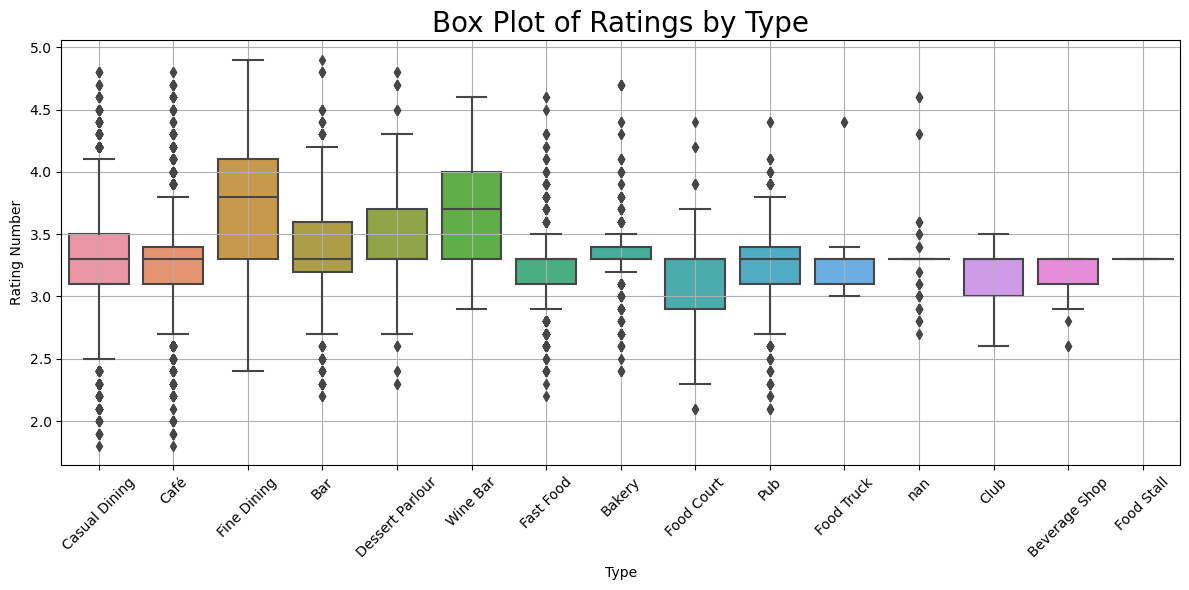

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='rating_number', data=cuisine_df)
plt.title('Box Plot of Ratings by Type', fontsize=20)
plt.xlabel('Type')
plt.ylabel('Rating Number')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Fine dining and wine bars generally receive higher average ratings, around 4.0, indicating that patrons often appreciate the quality of food, service, and overall experience in these establishments. 

In contrast, other types of entertainment, which have ratings between 3.0 and 3.5, may not focus as heavily on the dining experience. This could include casual dining, bars, or fast food, where the emphasis might be more on convenience and affordability rather than on the quality of food or service.

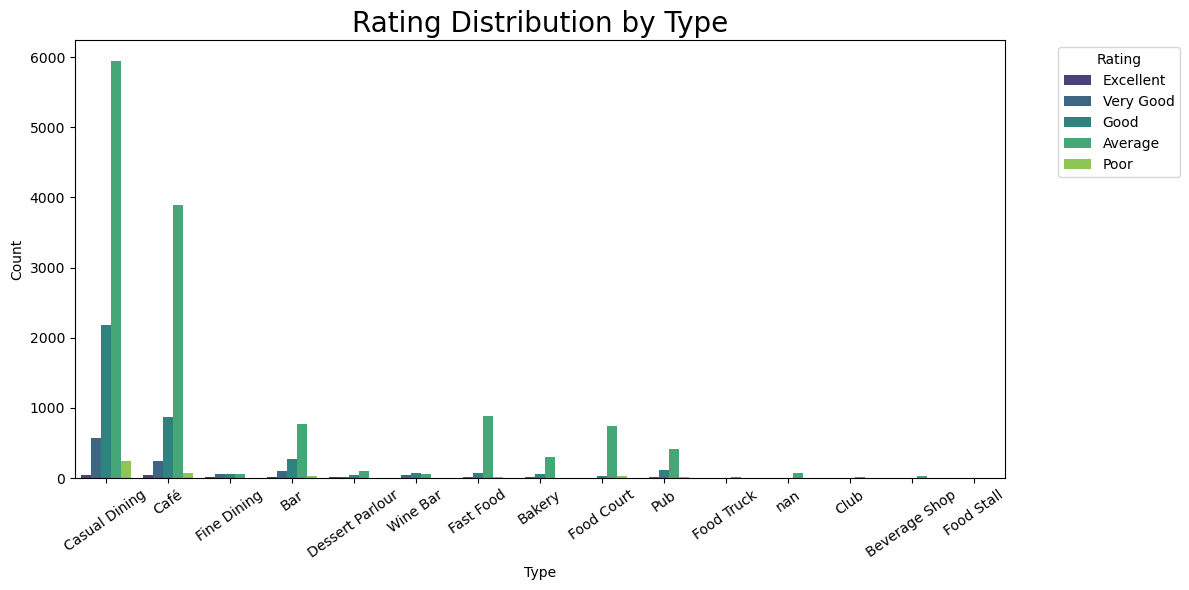

In [41]:
# Define the desired order
rating_order = ['Excellent', 'Very Good', 'Good', 'Average', 'Poor']

# Display a bar chart 
plt.figure(figsize=(12, 6))
sns.countplot(x='type', hue='rating_text', data=cuisine_df, palette='viridis', hue_order=rating_order)
plt.title('Rating Distribution by Type', fontsize=20)
plt.xlabel('Type')
plt.ylabel('Count')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()

Casual dining and cafe restaurants receive the most votes from customers, likely because they are common entertainment options and offer affordable prices that appeal to a wide range of patrons. Most ratings for these establishments tend to be average, suggesting that many restaurants in Sydney may not prioritise high-quality food and service. This could indicate a focus on accessibility and convenience rather than delivering an exceptional dining experience.

## 3. Produce Cuisine Density Map

In [42]:
# Load the Sydney suburbs GeoJSON file
gdf_suburbs = gpd.read_file('data/sydney.geojson')

<AxesSubplot:>

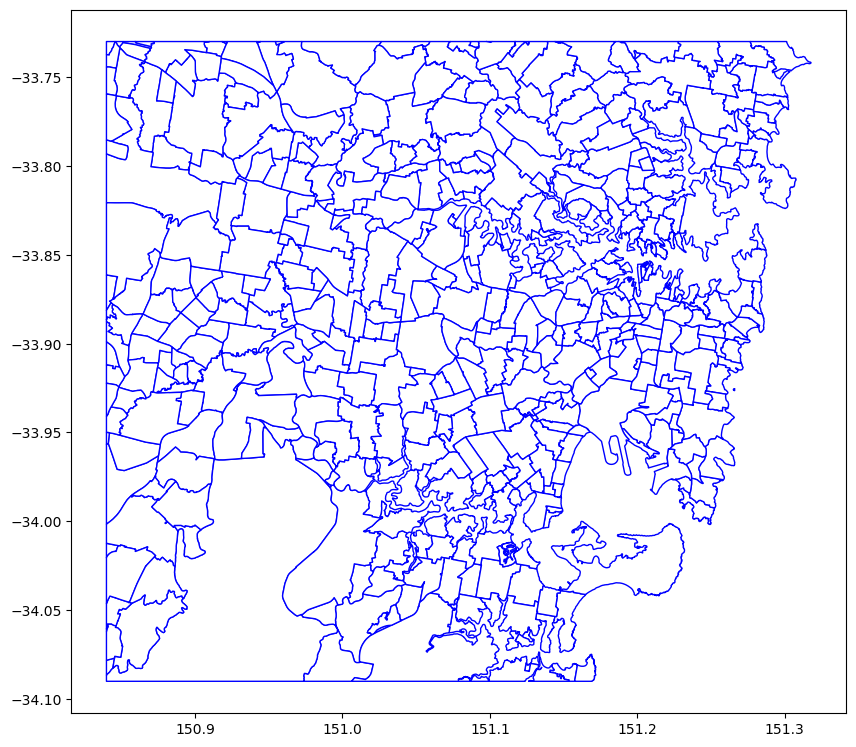

In [43]:
# Show boundary map
gdf_suburbs.plot(figsize=(10, 10), edgecolor='blue', facecolor='white')

In [44]:
# Join data and map
geometry = gpd.points_from_xy(cuisine_df["lng"], cuisine_df["lat"])
cuisine_df = gpd.GeoDataFrame(cuisine_df, geometry=geometry)

combined_gdf = gpd.sjoin(gdf_suburbs, cuisine_df, how="left", op="intersects")

/Users/tamminhhuynh/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/var/folders/02/lspf_dmn19g6q514lw374fl00000gn/T/ipykernel_926/105730882.py:5: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  combined_gdf = gpd.sjoin(gdf_suburbs, cuisine_df, how="left", op="intersects")


In [45]:
# Show cuisine map function
def show_cuisine_densitymap(cuisine, colour):

    map_gdf = combined_gdf
    
    # Read suburb boundaries from a GeoJSON file
    desired_cuisine = cuisine

    # Filter restaurants serving the specified cuisine
    cuisine_restaurants = map_gdf[map_gdf['cuisine'] == desired_cuisine]
    
    # Perform a spatial join to count the number of cuisine-specific restaurants in each suburb
    suburb_cuisine_count = cuisine_restaurants.groupby('SSC_NAME')['title'].count().reset_index(name='RestaurantCount')
    
    # Merge the counts with the suburb GeoDataFrame
    map_gdf = map_gdf.merge(suburb_cuisine_count, on='SSC_NAME', how='left')
    
    # Fill NaN values in 'RestaurantCount' by mode within the same subzone
    map_gdf['RestaurantCount'] = map_gdf.groupby('subzone')['RestaurantCount'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.median() else 0))
    
    # Plot the cuisine density map
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    map_gdf.plot(column='RestaurantCount', cmap=colour, linewidth=1, ax=ax, edgecolor='0.6', legend=True)
    ax.set_title(f'{cuisine}')
    plt.axis('off')
    plt.show()

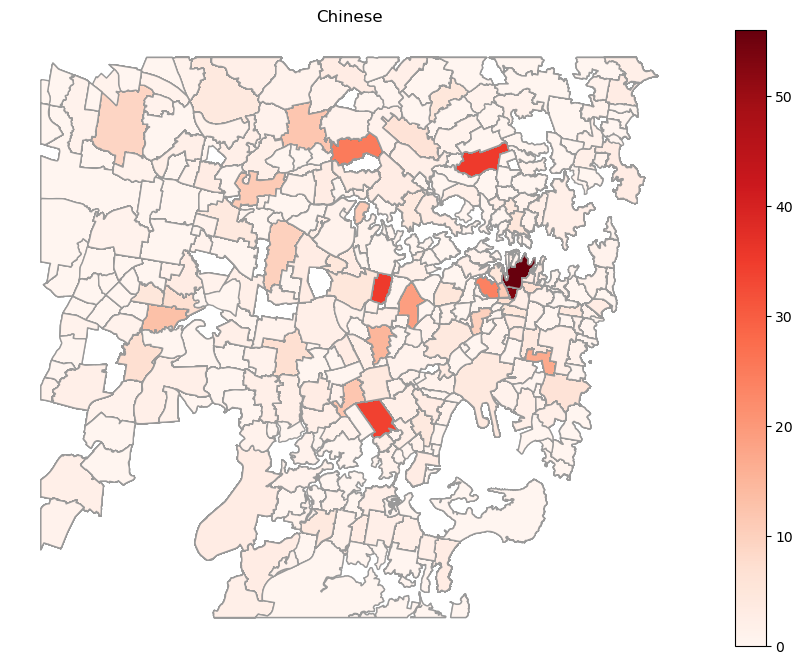

In [46]:
show_cuisine_densitymap(cuisine='Chinese', colour = 'Reds')

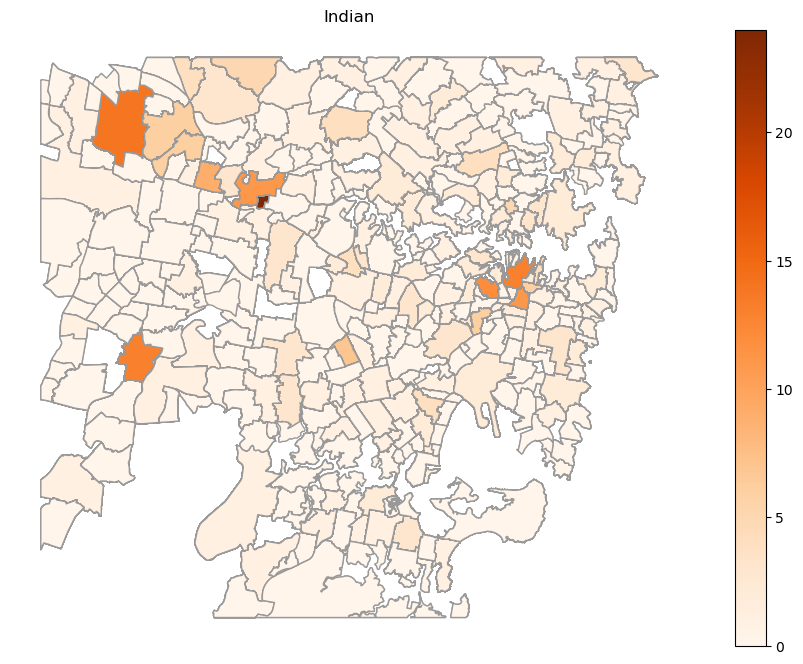

In [47]:
show_cuisine_densitymap(cuisine='Indian', colour = 'Oranges')

## 4. Employing interactive plotting libraries

In [48]:
import plotly.express as px
import plotly.io as pio

# Create a Plotly map
fig = px.scatter_mapbox(
    cuisine_df,
    lat='lat',
    lon='lng',
    color='cuisine', 
    size_max=15,
    zoom=10,
    mapbox_style="carto-positron",
    hover_name='cuisine',
    title='Restaurant Distribution by Cuisine',
)

# Add interactivity with dropdown for filtering
cuisines = cuisine_df['cuisine'].unique()

# Create a list of visibility lists for each cuisine
visibility = [[cuisine in cuisine_df['cuisine'].unique() if cuisine == c else False for c in cuisines] for cuisine in cuisines]

# Update layout with dropdown menu
fig.update_layout(
    updatemenus=[
        {
            'buttons': [
                {
                    'label': cuisine,
                    'method': 'update',
                    'args': [
                        {'visible': visibility[i]},
                        {'title': f'Restaurant Distribution by {cuisine}'}
                    ]
                } for i, cuisine in enumerate(cuisines)
            ],
            'direction': 'down',
            'showactive': True,
            'x': 0.1,
            'xanchor': 'left',
            'y': 1.15,
            'yanchor': 'top'
        },
        {
            'buttons': [
                {
                    'label': 'Show All',
                    'method': 'update',
                    'args': [{'visible': [True] * len(cuisines)},
                              {'title': 'Restaurant Distribution by Cuisine'}]
                }
            ],
            'direction': 'down',
            'showactive': False,
            'x': 0.2,
            'xanchor': 'left',
            'y': 1.15,
            'yanchor': 'top'
        }
    ]
)

# Show the figure
fig.show()

# Save the figure to an HTML file
pio.write_html(fig, 'restaurant_distribution_by_cuisine.html')

Please open to the HTML file for view the figure

Traditional static plots would present a fixed image, making it difficult for users to explore the data dynamically. They couldn't easily filter by specific cuisines or zoom in on particular locations to gain insights. This lack of interactivity can obscure important trends and make it challenging to derive meaningful conclusions from complex datasets.

However, by utilizing interactive libraries like Plotly, the code empowers users to filter the data through a dropdown menu, zoom into areas of interest, and hover over points to access detailed information about each restaurant. This level of engagement allows for a richer data exploration experience, making the visualization not only more informative but also more intuitive and accessible. Additionally, the ability to export the interactive plot as an HTML file further enhances its usability, allowing it to be shared and viewed across different platforms.